Models: 100%|██████████| 1/1 [00:00<00:00,  2.42model/s]


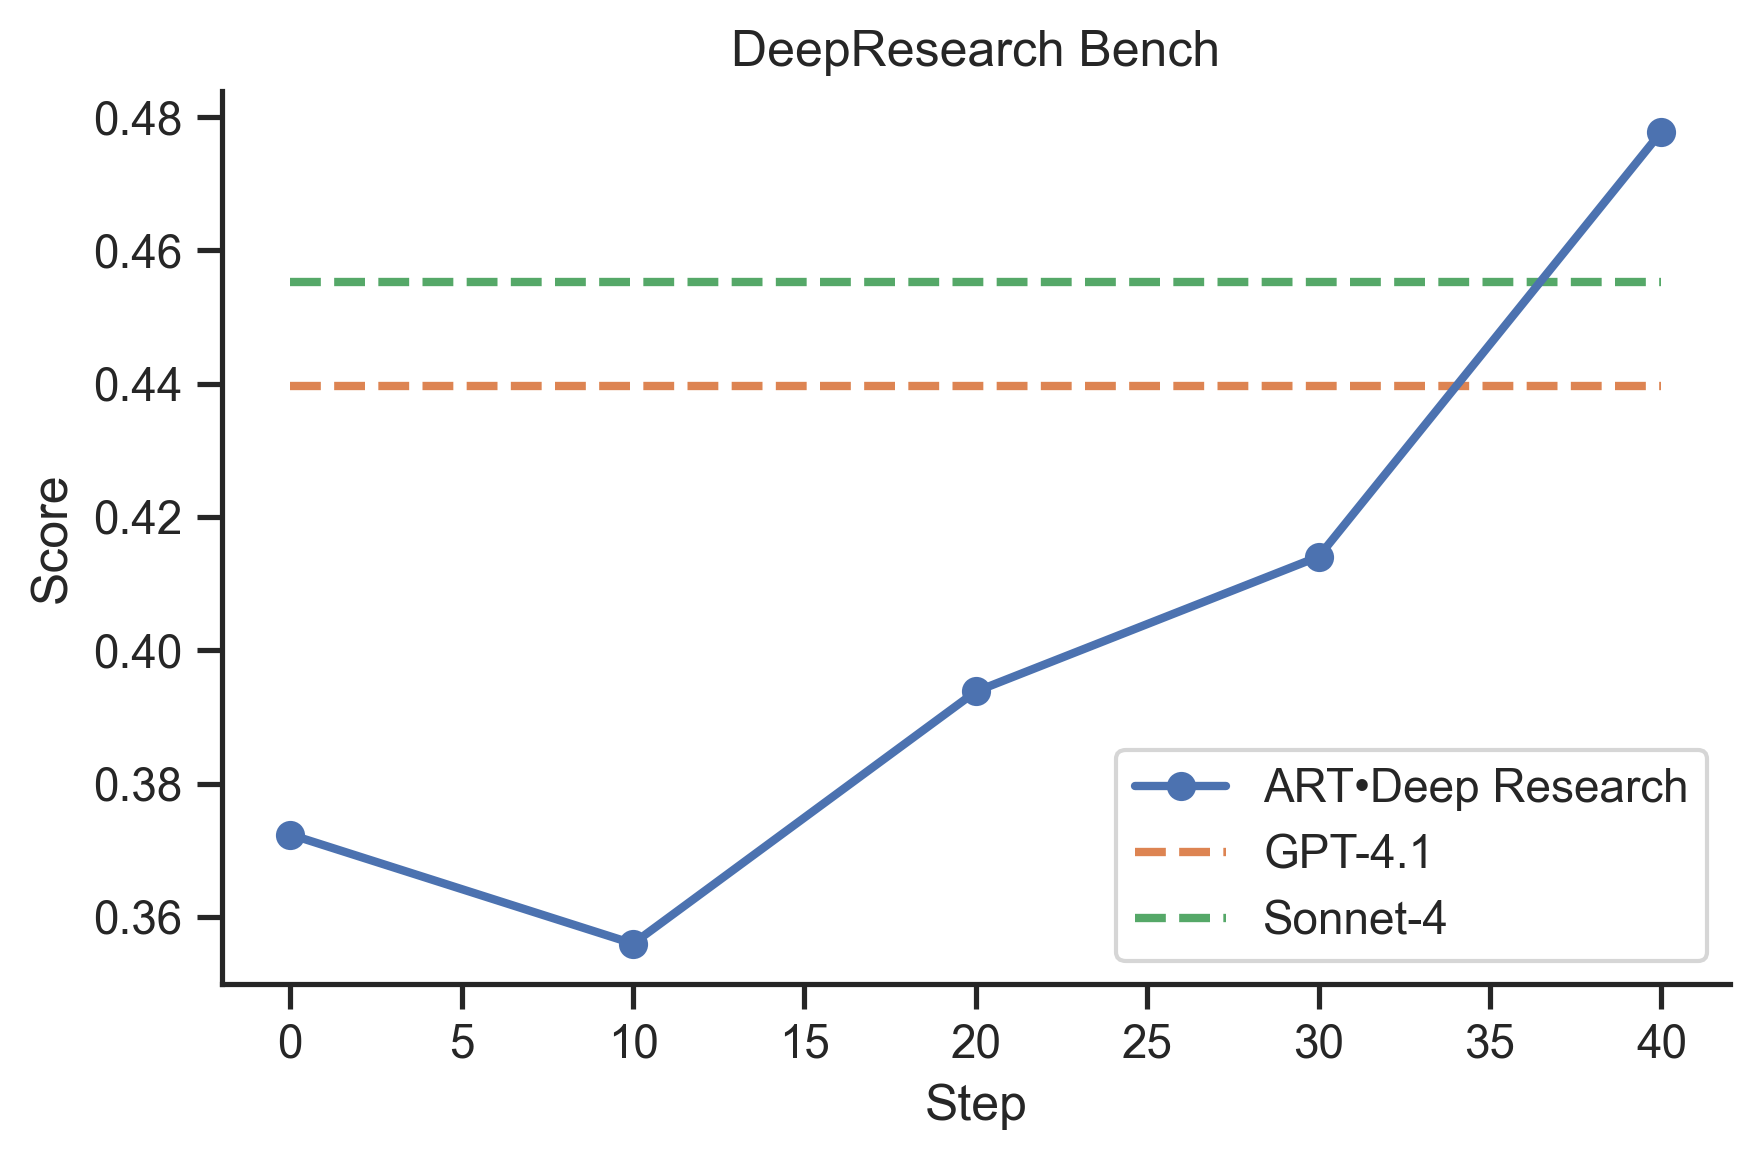

In [ ]:
from art.utils.benchmarking.charts import (
    training_progress_chart,
)
from art.utils.benchmarking.load_trajectories import load_trajectories
from art.utils.benchmarking.types import BenchmarkModelKey
from art.utils.get_repo_root_path import get_repo_root_path
from art.utils.s3 import pull_model_from_s3
import polars as pl


project_name = "langgraph-deep-re-benchmark"
await pull_model_from_s3(
    model_name="deep-agent-0018-sft",
    project=project_name,
    exclude=["checkpoints"]
)
df = await load_trajectories(
    project_name=project_name,
    models=["deep-agent-0018-sft", "gpt-4.1", "sonnet-4"],
)

df = df.filter(pl.col("step") <= 40)

line_graph = training_progress_chart(
    df,
    "reward",
    models=[
        BenchmarkModelKey("deep-agent-0018-sft", "ART•Deep Research", "val"),
        BenchmarkModelKey("gpt-4.1", "GPT-4.1", "val"),
        BenchmarkModelKey("sonnet-4", "Sonnet-4", "val"),
    ],
    title="DeepResearch Bench",
    y_label="Score",
)
line_graph.savefig(f"../charts/accuracy-training-progress.svg")